# 01 - Data Exploration

**Customer Lifetime Value Prediction**

**Team:** The Starks
- Othmane Zizi (261255341)
- Fares Joni (261254593)
- Tanmay Giri (261272443)

This notebook performs initial exploration of the Online Retail II dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 1. Load the Data

In [2]:
# Load both sheets from the Excel file
data_path = Path('../data/raw/online_retail_II.xlsx')

print("Loading Year 2009-2010...")
df_2009_2010 = pd.read_excel(data_path, sheet_name='Year 2009-2010')
print(f"Shape: {df_2009_2010.shape}")

print("\nLoading Year 2010-2011...")
df_2010_2011 = pd.read_excel(data_path, sheet_name='Year 2010-2011')
print(f"Shape: {df_2010_2011.shape}")

# Combine sheets
df = pd.concat([df_2009_2010, df_2010_2011], ignore_index=True)
print(f"\nCombined shape: {df.shape}")

Loading Year 2009-2010...


Shape: (525461, 8)

Loading Year 2010-2011...


Shape: (541910, 8)

Combined shape: (1067371, 8)


## 2. Basic Data Info

In [3]:
# Display first few rows
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [4]:
# Data types and info
print("Data Types:")
print(df.dtypes)
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Data Types:
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

Memory usage: 266.48 MB


In [5]:
# Summary statistics
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1067371.00,1067371,1067371.00,824364.00
mean,9.94,2011-01-02 21:13:55.394028544,4.65,15324.64
min,-80995.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-07-09 09:46:00,1.25,13975.00
50%,3.00,2010-12-07 15:28:00,2.10,15255.00
75%,10.00,2011-07-22 10:23:00,4.15,16797.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,172.71,NaN,123.55,1697.46


## 3. Missing Values Analysis

In [6]:
# Check missing values
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})
missing_df[missing_df['Missing Count'] > 0]

,Missing Count,Missing %
Description,4382,0.41
Customer ID,243007,22.77


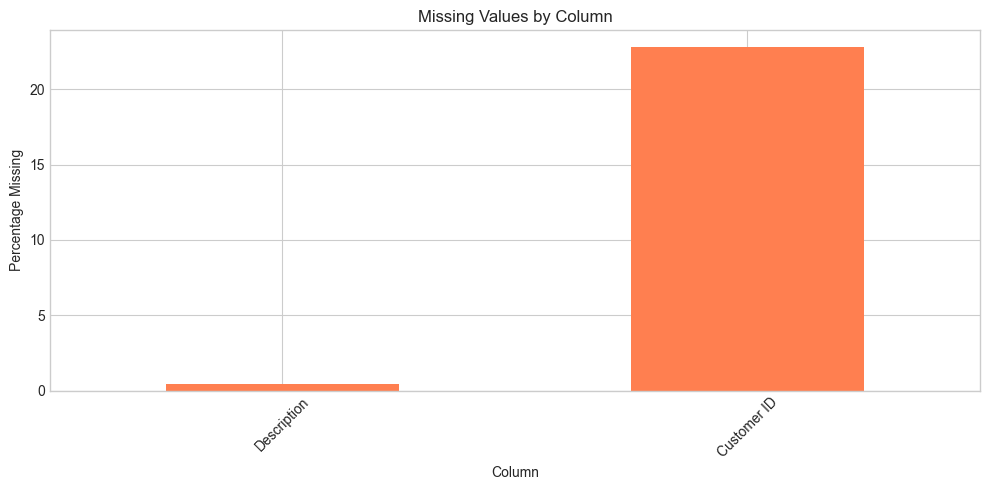

In [7]:
# Visualize missing values
fig, ax = plt.subplots(figsize=(10, 5))
missing_pct[missing_pct > 0].plot(kind='bar', ax=ax, color='coral')
ax.set_title('Missing Values by Column')
ax.set_ylabel('Percentage Missing')
ax.set_xlabel('Column')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../reports/figures/missing_values.png', dpi=150, bbox_inches='tight')
plt.show()

## 4. Date Range Analysis

In [8]:
# Convert InvoiceDate to datetime if not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print(f"Date Range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")
print(f"Duration: {(df['InvoiceDate'].max() - df['InvoiceDate'].min()).days} days")

Date Range: 2009-12-01 07:45:00 to 2011-12-09 12:50:00
Duration: 738 days


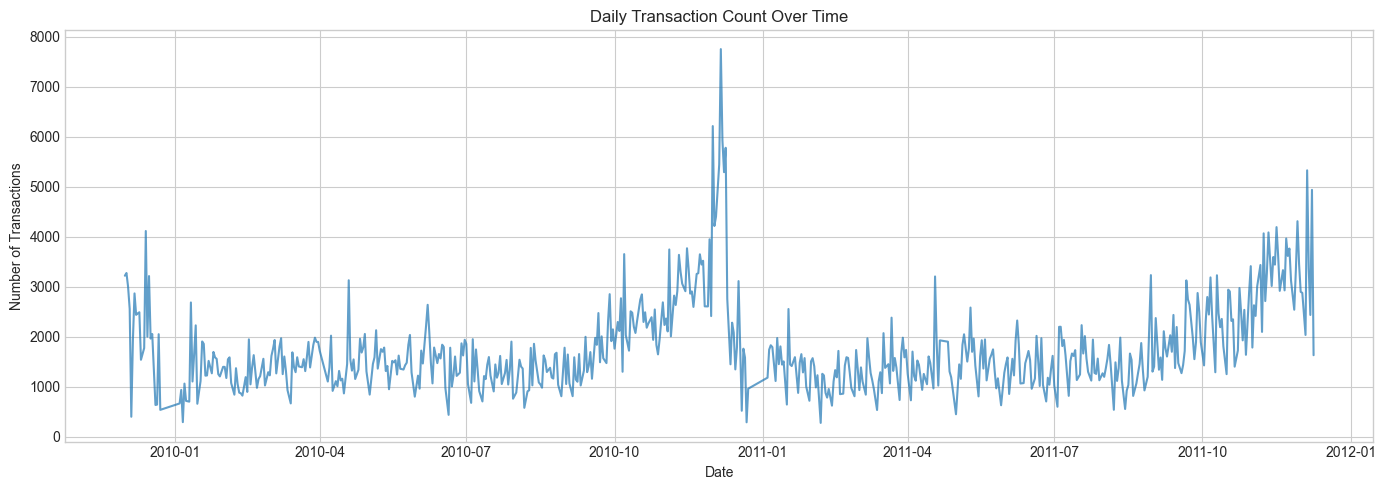

In [9]:
# Transactions over time
daily_transactions = df.groupby(df['InvoiceDate'].dt.date).size()

fig, ax = plt.subplots(figsize=(14, 5))
daily_transactions.plot(ax=ax, alpha=0.7)
ax.set_title('Daily Transaction Count Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Transactions')
plt.tight_layout()
plt.savefig('../reports/figures/daily_transactions.png', dpi=150, bbox_inches='tight')
plt.show()

## 5. Customer Analysis

In [10]:
# Filter rows with Customer ID
df_with_customer = df[df['Customer ID'].notna()].copy()
df_with_customer['Customer ID'] = df_with_customer['Customer ID'].astype(int)

print(f"Total transactions: {len(df)}")
print(f"Transactions with Customer ID: {len(df_with_customer)} ({len(df_with_customer)/len(df)*100:.1f}%)")
print(f"Unique customers: {df_with_customer['Customer ID'].nunique()}")

Total transactions: 1067371
Transactions with Customer ID: 824364 (77.2%)
Unique customers: 5942


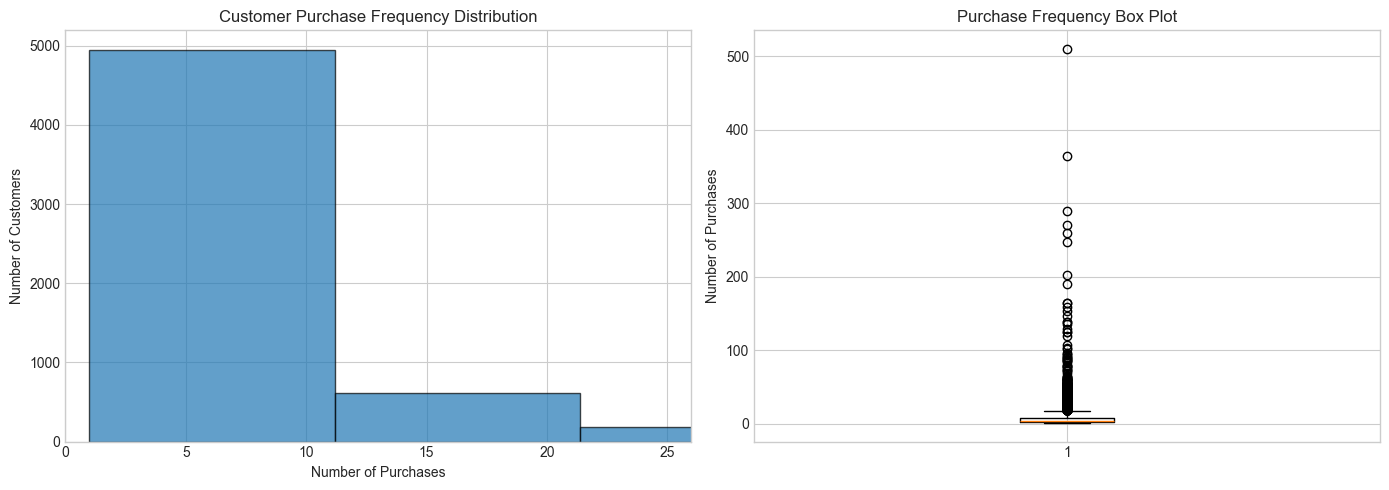


Purchase Frequency Statistics:
count   5942.00
mean       7.55
std       15.97
min        1.00
25%        2.00
50%        4.00
75%        8.00
max      510.00
Name: Invoice, dtype: float64


In [11]:
# Customer purchase frequency distribution
customer_freq = df_with_customer.groupby('Customer ID')['Invoice'].nunique()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(customer_freq, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Customer Purchase Frequency Distribution')
axes[0].set_xlabel('Number of Purchases')
axes[0].set_ylabel('Number of Customers')
axes[0].set_xlim(0, customer_freq.quantile(0.95))  # Focus on 95th percentile

# Box plot
axes[1].boxplot(customer_freq, vert=True)
axes[1].set_title('Purchase Frequency Box Plot')
axes[1].set_ylabel('Number of Purchases')

plt.tight_layout()
plt.savefig('../reports/figures/customer_frequency.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nPurchase Frequency Statistics:")
print(customer_freq.describe())

## 6. Country Analysis

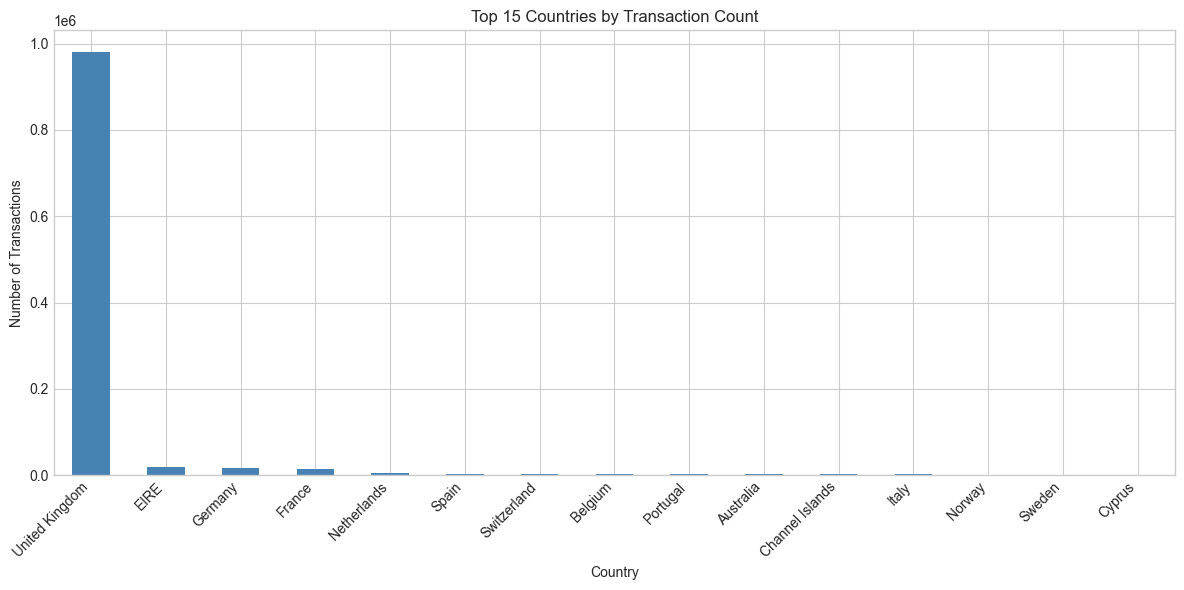


Country Distribution:
UK transactions: 981330 (91.9%)
Non-UK transactions: 86041 (8.1%)


In [12]:
# Top countries by transaction count
country_counts = df['Country'].value_counts()

fig, ax = plt.subplots(figsize=(12, 6))
country_counts.head(15).plot(kind='bar', ax=ax, color='steelblue')
ax.set_title('Top 15 Countries by Transaction Count')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../reports/figures/top_countries.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nCountry Distribution:")
print(f"UK transactions: {country_counts['United Kingdom']} ({country_counts['United Kingdom']/len(df)*100:.1f}%)")
print(f"Non-UK transactions: {country_counts.sum() - country_counts['United Kingdom']} ({(1 - country_counts['United Kingdom']/len(df))*100:.1f}%)")

## 7. Product Analysis

In [13]:
print(f"Unique products (StockCode): {df['StockCode'].nunique()}")
print(f"Unique descriptions: {df['Description'].nunique()}")

# Top selling products
top_products = df.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Quantity Sold:")
top_products

Unique products (StockCode): 5305


Unique descriptions: 5698

Top 10 Products by Quantity Sold:


StockCode  Description                       
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     108545
85123A     WHITE HANGING HEART T-LIGHT HOLDER     92453
84879      ASSORTED COLOUR BIRD ORNAMENT          81306
85099B     JUMBO BAG RED RETROSPOT                77671
17003      BROCADE RING PURSE                     70700
21977      PACK OF 60 PINK PAISLEY CAKE CASES     56575
84991      60 TEATIME FAIRY CAKE CASES            54366
22197      SMALL POPCORN HOLDER                   49616
21212      PACK OF 72 RETROSPOT CAKE CASES        49344
           PACK OF 72 RETRO SPOT CAKE CASES       46106
Name: Quantity, dtype: int64

## 8. Price and Quantity Analysis

In [14]:
# Check for negative values and cancelled transactions
print("Quantity Analysis:")
print(f"  Negative quantities: {(df['Quantity'] < 0).sum()} ({(df['Quantity'] < 0).mean()*100:.2f}%)")
print(f"  Zero quantities: {(df['Quantity'] == 0).sum()}")
print(f"  Positive quantities: {(df['Quantity'] > 0).sum()}")

print("\nPrice Analysis:")
print(f"  Zero or negative prices: {(df['Price'] <= 0).sum()} ({(df['Price'] <= 0).mean()*100:.2f}%)")

# Check cancelled transactions (Invoice starting with 'C')
cancelled = df['Invoice'].astype(str).str.startswith('C')
print(f"\nCancelled transactions: {cancelled.sum()} ({cancelled.mean()*100:.2f}%)")

Quantity Analysis:
  Negative quantities: 22950 (2.15%)
  Zero quantities: 0
  Positive quantities: 1044421

Price Analysis:
  Zero or negative prices: 6207 (0.58%)



Cancelled transactions: 19494 (1.83%)


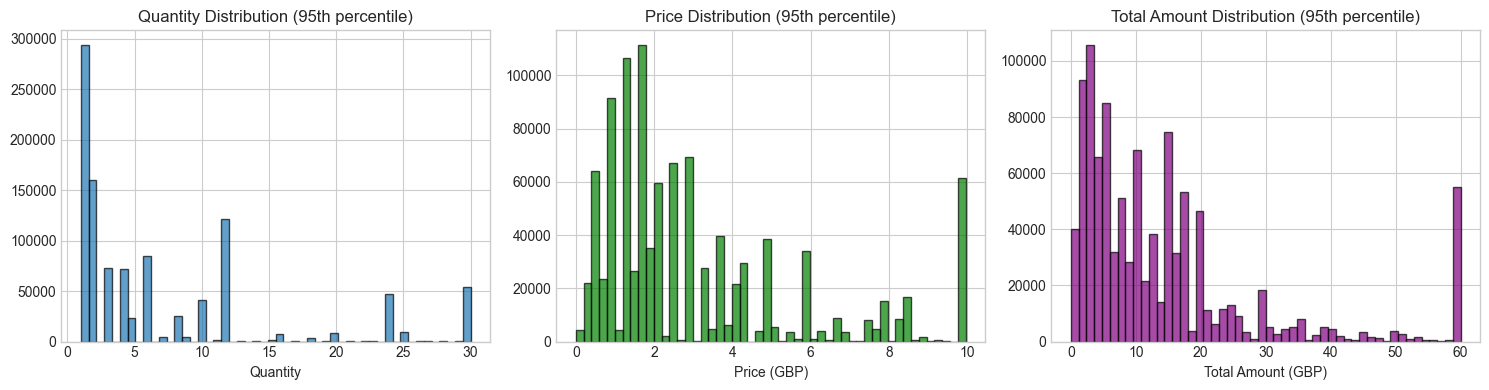

In [15]:
# Filter valid transactions for price/quantity analysis
df_valid = df[(df['Quantity'] > 0) & (df['Price'] > 0)].copy()
df_valid['TotalAmount'] = df_valid['Quantity'] * df_valid['Price']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Quantity distribution
axes[0].hist(df_valid['Quantity'].clip(upper=df_valid['Quantity'].quantile(0.95)), 
             bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Quantity Distribution (95th percentile)')
axes[0].set_xlabel('Quantity')

# Price distribution
axes[1].hist(df_valid['Price'].clip(upper=df_valid['Price'].quantile(0.95)), 
             bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1].set_title('Price Distribution (95th percentile)')
axes[1].set_xlabel('Price (GBP)')

# Total Amount distribution
axes[2].hist(df_valid['TotalAmount'].clip(upper=df_valid['TotalAmount'].quantile(0.95)), 
             bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[2].set_title('Total Amount Distribution (95th percentile)')
axes[2].set_xlabel('Total Amount (GBP)')

plt.tight_layout()
plt.savefig('../reports/figures/price_quantity_dist.png', dpi=150, bbox_inches='tight')
plt.show()

## 9. Summary Statistics for Cleaned Data Preview

In [16]:
# Preview of data after basic cleaning
df_clean_preview = df[
    (df['Customer ID'].notna()) & 
    (~df['Invoice'].astype(str).str.startswith('C')) &
    (df['Quantity'] > 0) & 
    (df['Price'] > 0)
].copy()

print("Data Summary After Basic Cleaning Preview:")
print(f"  Original rows: {len(df):,}")
print(f"  Cleaned rows: {len(df_clean_preview):,} ({len(df_clean_preview)/len(df)*100:.1f}%)")
print(f"  Unique customers: {df_clean_preview['Customer ID'].nunique():,}")
print(f"  Unique invoices: {df_clean_preview['Invoice'].nunique():,}")
print(f"  Date range: {df_clean_preview['InvoiceDate'].min().date()} to {df_clean_preview['InvoiceDate'].max().date()}")

Data Summary After Basic Cleaning Preview:
  Original rows: 1,067,371
  Cleaned rows: 805,549 (75.5%)
  Unique customers: 5,878
  Unique invoices: 36,969
  Date range: 2009-12-01 to 2011-12-09


## 10. Key Observations

### Data Quality:
- ~20% of records missing Customer ID - these will be removed
- ~2% cancelled transactions (Invoice starts with 'C') - these will be removed
- Some negative quantities exist (returns/cancellations)

### Business Insights:
- UK dominates the customer base (~90% of transactions)
- Wide variation in purchase frequency across customers
- Strong seasonality expected (retail business)

### Next Steps:
1. Clean the data (remove missing CustomerID, cancelled orders, negative values)
2. Engineer RFM features
3. Create train/test split based on time (observation vs prediction period)